# Aircraft Purchase Analysis Project

## Business Problem

Your company is expanding in to new industries to diversify its portfolio. Specifically, they are interested in purchasing and operating airplanes for commercial and private enterprises, but do not know anything about the potential risks of aircraft. You are charged with determining which aircraft are the lowest risk for the company to start this new business endeavor. You must then translate your findings into actionable insights that the head of the new aviation division can use to help decide which aircraft to purchase


## Objective.

In order to anaylize the difference in aircraft safety. We first must determine which aircrafts cause the most accidents, we will do so by determining the following:

* Analyzing the amount of different accidents fatal, serious, Non-Fatal
* Aircraft damage
* Injury Severity
* Engine Types
* Aircraft Category
* Weather Condition

I'll first proceed by installing the neccessary libraries needed to complete these objectives

## Import neccessary libraries from python


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Extract
Extract the data required, found in the NTSB database.

In [5]:
data = pd.read_csv('./data/AviationData.csv', encoding='latin-1')

C:\Users\omend\AppData\Local\Temp\ipykernel_28512\2146229675.py:1: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('./data/AviationData.csv', encoding='latin-1')


In [6]:
data

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

In [8]:
data['Injury.Severity'].values

array(['Fatal(2)', 'Fatal(4)', 'Fatal(3)', ..., 'Non-Fatal', nan, 'Minor'],
      dtype=object)

# Establishing missing values from our independent and dependent variable

We will determing the amount of missing values and determine the correct course for manipulating the data. Let's start by finding the missing values within the data

In [12]:
data.isna().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38757
Airport.Name              36185
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1382
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7096
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6384
Publication.Date          13771
dtype: i

Based off the information we see that there are missing items within the injury severity, and aircraft damage. Let's take a look at all possible columns that can be considered an independent and dependent vairable for this data.

### Independent Variables
* Injury Severity
* Aircraft Damage
* Total Fatal Injuries
* Total Serious Injuries
* Total Minor Injuries
* Total Uninjured

### Dependent Variables
* Make
* Model
* Number of Engines
* Engine Type
* Weather Condition
* Aircraft Category

In [15]:
def count_na_values(data):
    '''Takes a DataFrame (data) as input and calculates the count of NaN values for each specified column.
        Returns a tuple containing the count'''
    columns_to_check = ['Injury.Severity', 'Make', 'Aircraft.damage', 'Aircraft.Category', 'Engine.Type', 'Number.of.Engines','Model','Total.Fatal.Injuries','Total.Serious.Injuries','Total.Minor.Injuries','Total.Uninjured','Weather.Condition']
    na_counts = [data[col].isna().sum() for col in columns_to_check]
    return tuple(na_counts)

missing_values = count_na_values(data)
missing_values

(1000, 63, 3194, 56602, 7096, 6084, 92, 11401, 12510, 11933, 5912, 4492)

We are left with a tuple, within this tuple are the values missing from each column specified above.

Based off the information we see that there are missing items within the injury severity, total fatal injuries, total serious injuries, total minor injuries, total uninjured, and aircraft damage.

I'll explore these columns, lets create a function that will provide us with the total number of categories within each columns

In [66]:
def count_categories(data, column_name):
    if column_name in data.columns:
        return data[column_name].value_counts().to_dict()
    else:
        return f"This column does not exist within the dataframe"
    

In [67]:
total_fatal_injury_count = count_categories(data,'Total.Fatal.Injuries')
total_fatal_injury_count
# data['Total.Fatal.Injuries'].value_counts()

{0.0: 59675,
 1.0: 8883,
 2.0: 5173,
 3.0: 1589,
 4.0: 1103,
 5.0: 346,
 6.0: 216,
 7.0: 101,
 8.0: 70,
 10.0: 45,
 9.0: 42,
 14.0: 19,
 11.0: 17,
 12.0: 11,
 13.0: 11,
 20.0: 6,
 18.0: 6,
 17.0: 6,
 19.0: 5,
 23.0: 5,
 15.0: 5,
 16.0: 4,
 25.0: 4,
 21.0: 4,
 34.0: 3,
 97.0: 3,
 24.0: 3,
 65.0: 3,
 71.0: 3,
 154.0: 3,
 118.0: 2,
 75.0: 2,
 160.0: 2,
 33.0: 2,
 62.0: 2,
 157.0: 2,
 349.0: 2,
 89.0: 2,
 104.0: 2,
 92.0: 2,
 49.0: 2,
 88.0: 2,
 102.0: 2,
 113.0: 2,
 52.0: 2,
 44.0: 2,
 46.0: 2,
 228.0: 2,
 131.0: 2,
 70.0: 2,
 29.0: 2,
 43.0: 2,
 27.0: 2,
 87.0: 2,
 28.0: 2,
 30.0: 2,
 82.0: 2,
 132.0: 2,
 153.0: 2,
 135.0: 1,
 124.0: 1,
 96.0: 1,
 103.0: 1,
 114.0: 1,
 107.0: 1,
 117.0: 1,
 145.0: 1,
 199.0: 1,
 57.0: 1,
 152.0: 1,
 90.0: 1,
 54.0: 1,
 158.0: 1,
 121.0: 1,
 41.0: 1,
 188.0: 1,
 112.0: 1,
 66.0: 1,
 78.0: 1,
 224.0: 1,
 150.0: 1,
 162.0: 1,
 58.0: 1,
 295.0: 1,
 239.0: 1,
 50.0: 1,
 127.0: 1,
 77.0: 1,
 42.0: 1,
 45.0: 1,
 256.0: 1,
 55.0: 1,
 47.0: 1,
 217.0: 1,
 80.0: 1

In [68]:
total_serious_injury_count = count_categories(data,'Total.Serious.Injuries')
total_serious_injury_count
# data['Total.Serious.Injuries'].value_counts()

{0.0: 63289,
 1.0: 9125,
 2.0: 2815,
 3.0: 629,
 4.0: 258,
 5.0: 78,
 6.0: 41,
 7.0: 27,
 9.0: 16,
 10.0: 13,
 8.0: 13,
 13.0: 9,
 11.0: 6,
 26.0: 5,
 14.0: 5,
 12.0: 5,
 20.0: 3,
 25.0: 3,
 28.0: 3,
 21.0: 2,
 59.0: 2,
 50.0: 2,
 17.0: 2,
 47.0: 2,
 137.0: 1,
 19.0: 1,
 161.0: 1,
 27.0: 1,
 35.0: 1,
 67.0: 1,
 33.0: 1,
 88.0: 1,
 125.0: 1,
 53.0: 1,
 34.0: 1,
 41.0: 1,
 18.0: 1,
 63.0: 1,
 55.0: 1,
 23.0: 1,
 43.0: 1,
 39.0: 1,
 45.0: 1,
 44.0: 1,
 16.0: 1,
 60.0: 1,
 106.0: 1,
 81.0: 1,
 15.0: 1,
 22.0: 1}

In [69]:
total_minor_injury_count = count_categories(data,'Total.Serious.Injuries')
total_minor_injury_count
# data['Total.Minor.Injuries'].value_counts()

{0.0: 63289,
 1.0: 9125,
 2.0: 2815,
 3.0: 629,
 4.0: 258,
 5.0: 78,
 6.0: 41,
 7.0: 27,
 9.0: 16,
 10.0: 13,
 8.0: 13,
 13.0: 9,
 11.0: 6,
 26.0: 5,
 14.0: 5,
 12.0: 5,
 20.0: 3,
 25.0: 3,
 28.0: 3,
 21.0: 2,
 59.0: 2,
 50.0: 2,
 17.0: 2,
 47.0: 2,
 137.0: 1,
 19.0: 1,
 161.0: 1,
 27.0: 1,
 35.0: 1,
 67.0: 1,
 33.0: 1,
 88.0: 1,
 125.0: 1,
 53.0: 1,
 34.0: 1,
 41.0: 1,
 18.0: 1,
 63.0: 1,
 55.0: 1,
 23.0: 1,
 43.0: 1,
 39.0: 1,
 45.0: 1,
 44.0: 1,
 16.0: 1,
 60.0: 1,
 106.0: 1,
 81.0: 1,
 15.0: 1,
 22.0: 1}

In [70]:
total_uninjured_count = count_categories(data,'Total.Serious.Injuries')
total_uninjured_count

{0.0: 63289,
 1.0: 9125,
 2.0: 2815,
 3.0: 629,
 4.0: 258,
 5.0: 78,
 6.0: 41,
 7.0: 27,
 9.0: 16,
 10.0: 13,
 8.0: 13,
 13.0: 9,
 11.0: 6,
 26.0: 5,
 14.0: 5,
 12.0: 5,
 20.0: 3,
 25.0: 3,
 28.0: 3,
 21.0: 2,
 59.0: 2,
 50.0: 2,
 17.0: 2,
 47.0: 2,
 137.0: 1,
 19.0: 1,
 161.0: 1,
 27.0: 1,
 35.0: 1,
 67.0: 1,
 33.0: 1,
 88.0: 1,
 125.0: 1,
 53.0: 1,
 34.0: 1,
 41.0: 1,
 18.0: 1,
 63.0: 1,
 55.0: 1,
 23.0: 1,
 43.0: 1,
 39.0: 1,
 45.0: 1,
 44.0: 1,
 16.0: 1,
 60.0: 1,
 106.0: 1,
 81.0: 1,
 15.0: 1,
 22.0: 1}

In [72]:
injury_severity_count = count_categories(data,'Injury.Severity')
injury_severity_count

{'Non-Fatal': 67357,
 'Fatal(1)': 6167,
 'Fatal': 5262,
 'Fatal(2)': 3711,
 'Incident': 2219,
 'Fatal(3)': 1147,
 'Fatal(4)': 812,
 'Fatal(5)': 235,
 'Minor': 218,
 'Serious': 173,
 'Fatal(6)': 161,
 'Unavailable': 96,
 'Fatal(7)': 56,
 'Fatal(8)': 51,
 'Fatal(10)': 32,
 'Fatal(9)': 18,
 'Fatal(14)': 11,
 'Fatal(11)': 10,
 'Fatal(13)': 9,
 'Fatal(12)': 8,
 'Fatal(18)': 5,
 'Fatal(20)': 5,
 'Fatal(15)': 5,
 'Fatal(25)': 4,
 'Fatal(23)': 4,
 'Fatal(19)': 3,
 'Fatal(16)': 3,
 'Fatal(34)': 3,
 'Fatal(17)': 3,
 'Fatal(104)': 2,
 'Fatal(65)': 2,
 'Fatal(97)': 2,
 'Fatal(349)': 2,
 'Fatal(75)': 2,
 'Fatal(46)': 2,
 'Fatal(71)': 2,
 'Fatal(154)': 2,
 'Fatal(113)': 2,
 'Fatal(102)': 2,
 'Fatal(24)': 2,
 'Fatal(92)': 2,
 'Fatal(118)': 2,
 'Fatal(52)': 2,
 'Fatal(160)': 2,
 'Fatal(29)': 2,
 'Fatal(82)': 2,
 'Fatal(131)': 2,
 'Fatal(87)': 2,
 'Fatal(27)': 2,
 'Fatal(70)': 2,
 'Fatal(30)': 1,
 'Fatal(256)': 1,
 'Fatal(115)': 1,
 'Fatal(135)': 1,
 'Fatal(31)': 1,
 'Fatal(21)': 1,
 'Fatal(138)': 1,
 

I noticed that within the 'Injury.Severity' column that Fatal has a number of repeated inputs that have parantheses following the entry. To eliminate any confusion, I will proceed to replace all rows that have 'Fatal' under one category

In [73]:
#replacing the () followed by any number for elements within the injury severity column, regex, removes the parantheses from fatal 
data['Injury.Severity'].replace(regex='\((\d+)\)', value= '', inplace=True)

In [77]:
#reassign injury_severity_count to accept the changes
injury_severity_count = count_categories(data,'Injury.Severity')
injury_severity_count

{'Non-Fatal': 67357,
 'Fatal': 17826,
 'Incident': 2219,
 'Minor': 218,
 'Serious': 173,
 'Unavailable': 96}

In [78]:
data.dropna(subset=['Injury.Severity', 'Make', 'Aircraft.damage','Total.Fatal.Injuries','Total.Serious.Injuries','Total.Minor.Injuries','Total.Uninjured'], inplace=True)

In [79]:
data.isna().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     32
Country                     200
Latitude                  49372
Longitude                 49372
Airport.Code              30596
Airport.Name              28253
Injury.Severity               0
Aircraft.damage               0
Aircraft.Category         44767
Registration.Number         220
Make                          0
Model                        34
Amateur.Built                 1
Number.of.Engines          3366
Engine.Type                4207
FAR.Description           44998
Schedule                  62069
Purpose.of.flight          2806
Air.carrier               56720
Total.Fatal.Injuries          0
Total.Serious.Injuries        0
Total.Minor.Injuries          0
Total.Uninjured               0
Weather.Condition          2500
Broad.phase.of.flight     23731
Report.Status              4873
Publication.Date          12788
dtype: i

In [80]:
data[data['Make'] == 'BOEING']

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
64134,20080307X00283,Incident,DFW08IA074,2008-03-01,"Dallas, TX",United States,325043N,0096519W,DAL,DALLAS LOVE FIELD,...,NaN,SOUTHWEST AIRLINES CO,0.0,0.0,0.0,244.0,IMC,NaN,The failure of the taxiing flight crew to main...,25-09-2020
64247,20080404X00426,Incident,DFW08IA087,2008-03-27,"Houston, TX",United States,030026N,0951849W,KIAH,George Bush Intercontinental,...,NaN,Continental Airlines Inc,0.0,0.0,0.0,118.0,VMC,NaN,The flight crew's improper landing technique f...,25-09-2020
64341,20080417X00501,Accident,CHI08LA102,2008-04-14,"Youngstown, OH",United States,405742N,0804038W,4G4,Youngstown Elser Airport,...,Flight Test,M&S Aviation LLC,0.0,1.0,1.0,0.0,VMC,NaN,The pilot's failure to maintain adequate airsp...,25-09-2020
64387,20081003X63355,Incident,ENG08IA022,2008-04-20,"Newark, NJ",United States,404427N,0741014W,EWR,Newark Liberty International,...,NaN,KALITTA AIR LLC,0.0,0.0,0.0,5.0,NaN,NaN,An engine fire in the No. 3 engine due to the ...,25-09-2020
64423,20081219X16532,Incident,ENG08IA025,2008-04-27,"Singapore, Senegal",Senegal,NaN,NaN,SIN,Singapore Changi Airport,...,NaN,FedEx Ecpress,0.0,0.0,0.0,0.0,NaN,NaN,The Center Landing gear (CLG) strut failed due...,03-11-2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88592,20220929106019,Accident,DCA22WA214,2022-09-28,"London,",Great Britain,512820N,0002717E,EGLL,London Heathrow Airport,...,NaN,NaN,0.0,0.0,0.0,2.0,NaN,NaN,NaN,12-10-2022
88605,20221003106034,Incident,DCA23WA002,2022-10-01,"Manila,",Philippines,143553N,0120591E,RPLL,Ninoy Aquino International Air,...,NaN,Saudi Airlines,0.0,0.0,0.0,368.0,NaN,NaN,NaN,12-10-2022
88673,20221017106138,Accident,WPR23LA014,2022-10-15,"Petaluma, CA",United States,381528N,1223619W,O69,NaN,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,21-10-2022
88723,20221201106394,Accident,WPR23LA050,2022-10-26,"Long Beach, CA",United States,033495N,0011897W,KLGB,Long Beach Airport,...,Personal,NaN,0.0,0.0,0.0,2.0,VMC,NaN,NaN,01-12-2022


In [81]:
#Let's change the case for the categories to Title case 
data['Make'] = data['Make'].str.title()
data['Make']

0                           Stinson
1                             Piper
3                          Rockwell
6                            Cessna
7                            Cessna
                    ...            
88869                         Piper
88873            Cirrus Design Corp
88876                    Swearingen
88877                        Cessna
88886    American Champion Aircraft
Name: Make, Length: 71171, dtype: object

In [82]:
data[data['Make'] == 'Boeing']

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
50,20020917X02242,Accident,LAX82DVA10,1982-01-06,"NEAR BAKERSFIEL, CA",United States,NaN,NaN,NaN,NaN,...,Unknown,NaN,0.0,1.0,0.0,1.0,IMC,Cruise,Probable Cause,06-01-1983
84,20020917X01907,Accident,DCA82AA011,1982-01-13,"WASHINGTON, DC",United States,NaN,NaN,NaN,WASHINGTON NATIONAL,...,Unknown,"Air Florida, Inc",78.0,6.0,3.0,0.0,IMC,Takeoff,Probable Cause,13-01-1983
242,20020917X02585,Accident,SEA82DA028A,1982-02-06,"MEDFORD, OR",United States,NaN,NaN,MFR,MEDFORD-JACKSON COUNTY,...,Aerial Application,NaN,0.0,0.0,0.0,3.0,VMC,Taxi,Probable Cause,06-02-1983
320,20020917X02336,Incident,LAX82IA075,1982-02-15,"ONTARIO, CA",United States,NaN,NaN,ONT,ONTARIO INTERNATIONAL,...,Unknown,Aircal,0.0,0.0,0.0,119.0,IMC,Approach,Probable Cause,15-02-1983
344,20020917X02404,Accident,MIA82FA051,1982-02-17,"MIAMI, FL",United States,NaN,NaN,MIA,MIAMI INTERNATIONAL,...,Unknown,"Pan American World Airways, In",0.0,1.0,1.0,51.0,VMC,Takeoff,Probable Cause,17-02-1983
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88592,20220929106019,Accident,DCA22WA214,2022-09-28,"London,",Great Britain,512820N,0002717E,EGLL,London Heathrow Airport,...,NaN,NaN,0.0,0.0,0.0,2.0,NaN,NaN,NaN,12-10-2022
88605,20221003106034,Incident,DCA23WA002,2022-10-01,"Manila,",Philippines,143553N,0120591E,RPLL,Ninoy Aquino International Air,...,NaN,Saudi Airlines,0.0,0.0,0.0,368.0,NaN,NaN,NaN,12-10-2022
88673,20221017106138,Accident,WPR23LA014,2022-10-15,"Petaluma, CA",United States,381528N,1223619W,O69,NaN,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,21-10-2022
88723,20221201106394,Accident,WPR23LA050,2022-10-26,"Long Beach, CA",United States,033495N,0011897W,KLGB,Long Beach Airport,...,Personal,NaN,0.0,0.0,0.0,2.0,VMC,NaN,NaN,01-12-2022


In [83]:
data['Injury.Severity']

0            Fatal
1            Fatal
3            Fatal
6            Fatal
7        Non-Fatal
           ...    
88869    Non-Fatal
88873    Non-Fatal
88876    Non-Fatal
88877        Minor
88886    Non-Fatal
Name: Injury.Severity, Length: 71171, dtype: object

In [84]:
data['Aircraft.damage']

0          Destroyed
1          Destroyed
3          Destroyed
6          Destroyed
7        Substantial
            ...     
88869    Substantial
88873    Substantial
88876    Substantial
88877    Substantial
88886    Substantial
Name: Aircraft.damage, Length: 71171, dtype: object

Once we clean the column up. I want to group the injury type by make of the aircraft. Assessing which models have had fatal, serious, minor, Non-Fatal

In [85]:
data.to_csv('./data/AviationData_copy.csv', index=False)

In [86]:
data[data['Injury.Severity'] == 'Fatal']

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
6,20001218X45446,Accident,CHI81LA106,1981-08-01,"COTTON, MN",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,IMC,Unknown,Probable Cause,06-11-2001
13,20020917X02134,Accident,FTW82FRA14,1982-01-02,"HEARNE, TX",United States,NaN,NaN,T72,HEARNE MUNICIPAL,...,Personal,NaN,1.0,0.0,0.0,0.0,IMC,Takeoff,Probable Cause,02-01-1983
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88839,20221205106409,Accident,ERA23FA079,2022-12-03,"Venice, FL",United States,027347N,0082272W,KVNC,Venice Municipal Airport,...,Personal,ST PETE AVIATION SERVICES LLC,3.0,0.0,0.0,0.0,VMC,NaN,NaN,20-12-2022
88842,20221204106407,Accident,ERA23FA078,2022-12-04,"Beverly, MA",United States,423518N,0070553W,BVY,Beverly Regional Airport,...,Personal,NaN,1.0,0.0,0.0,0.0,VMC,NaN,NaN,20-12-2022
88843,20221205106408,Accident,CEN23FA057,2022-12-04,"Cleburne, TX",United States,321926N,0972553W,CPT,CLEBURNE RGNL,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,NaN,NaN,15-12-2022
88845,20221205106417,Accident,CEN23FA059,2022-12-05,"Corning, IA",United States,405957N,0944518W,CRZ,Corning Municipal Airport,...,Personal,PORTER STEVEN B,1.0,0.0,0.0,0.0,VMC,NaN,NaN,13-12-2022


In [88]:
#let's change the date from a string type to datetime, create 'Event Date column'
data['Event_Date'] = pd.to_datetime(data['Event.Date'])
data['Event_Date']

0       1948-10-24
1       1962-07-19
3       1977-06-19
6       1981-08-01
7       1982-01-01
           ...    
88869   2022-12-13
88873   2022-12-14
88876   2022-12-15
88877   2022-12-16
88886   2022-12-26
Name: Event_Date, Length: 71171, dtype: datetime64[ns]

In [19]:
data

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,Event_Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN,1948-10-24
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996,1962-07-19
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007,1974-08-30
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000,1977-06-19
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980,1979-08-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88869,20221213106455,Accident,WPR23LA065,2022-12-13,"Lewistown, MT",United States,047257N,0109280W,KLWT,Lewiston Municipal Airport,...,NaN,0.0,0.0,0.0,1.0,NaN,NaN,NaN,14-12-2022,2022-12-13
88873,20221215106463,Accident,ERA23LA090,2022-12-14,"San Juan, PR",United States,182724N,0066554W,SIG,FERNANDO LUIS RIBAS DOMINICCI,...,SKY WEST AVIATION INC TRUSTEE,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022,2022-12-14
88876,20221219106475,Accident,WPR23LA069,2022-12-15,"Wichita, KS",United States,373829N,0972635W,ICT,WICHITA DWIGHT D EISENHOWER NT,...,NaN,0.0,0.0,0.0,1.0,NaN,NaN,NaN,19-12-2022,2022-12-15
88877,20221219106470,Accident,ERA23LA091,2022-12-16,"Brooksville, FL",United States,282825N,0822719W,BKV,BROOKSVILLE-TAMPA BAY RGNL,...,GERBER RICHARD E,0.0,1.0,0.0,0.0,VMC,NaN,NaN,23-12-2022,2022-12-16


In [90]:
data['Injury.Severity'].value_counts()

Injury.Severity
Non-Fatal      55287
Fatal          14502
Incident        1018
Minor            204
Serious          151
Unavailable        9
Name: count, dtype: int64

In [91]:
data['Event_Date'].value_counts()

Event_Date
1982-05-16    25
1984-06-30    25
1983-06-05    24
2000-07-08    24
1983-08-05    24
              ..
2014-08-04     1
2014-07-24     1
2014-07-15     1
2014-06-30     1
2022-12-26     1
Name: count, Length: 12272, dtype: int64

## Finding the percentage of Injury type

Let's explore the amount the Fatal injuries, Non-Fatal injuries, and Minor injuries percentages occurred throughout each incident.

In [92]:
def damage_percentage_per_injury(data, injury_type):
    total_instances = len(data['Injury.Severity'])
    total = sum(data['Injury.Severity'] == injury_type)
    percentage = round(total/total_instances * 100, 2)
    return percentage

In [93]:
total_fatal = sum(data['Injury.Severity'] == 'Fatal')
total_fatal

14502

In [94]:
fatal_results = damage_percentage_per_injury(data,'Fatal')
print(f"The total percentage of aircraft that have had a fatal outcome: {fatal_results}%")

The total percentage of aircraft that have had a fatal outcome: 20.38%


In [95]:
non_fatal_results = damage_percentage_per_injury(data,'Non-Fatal')
print(f"The total percentage of aircraft that have had a non-fatal outcome: {non_fatal_results}%")

The total percentage of aircraft that have had a non-fatal outcome: 77.68%


In [96]:
minor_results = damage_percentage_per_injury(data,'Minor')
print(f"The total percentage of aircraft that have had a minor outcome: {minor_results}%")

The total percentage of aircraft that have had a minor outcome: 0.29%


In [97]:
serious_results = damage_percentage_per_injury(data,'Serious')
print(f"The total percentage of aircraft that have had a serious outcome: {serious_results}%")

The total percentage of aircraft that have had a serious outcome: 0.21%


In [98]:
fatal = data[data['Injury.Severity'] == 'Fatal']
fatal['Injury.Severity']

0        Fatal
1        Fatal
3        Fatal
6        Fatal
13       Fatal
         ...  
88839    Fatal
88842    Fatal
88843    Fatal
88845    Fatal
88846    Fatal
Name: Injury.Severity, Length: 14502, dtype: object

In [99]:
#groups the DataFrame data by the columns 'Make' and 'Injury.Severity' and calculates
#the size (count) of each group, resetting the index of the resulting DataFrame
# grouped again by 'Injury.Severity', and for each group, the maximum size is calculated.

injury_type = data.groupby(['Injury.Severity']).size().reset_index().groupby('Injury.Severity').max()

In [100]:
injury_type = injury_type.rename(columns={0: 'Count'})

In [101]:
injury_type

,Count
Injury.Severity,
Fatal,14502
Incident,1018
Minor,204
Non-Fatal,55287
Serious,151
Unavailable,9


In [102]:
injury_type.index

Index(['Fatal', 'Incident', 'Minor', 'Non-Fatal', 'Serious', 'Unavailable'], dtype='object', name='Injury.Severity')

In [103]:
injury_type.columns

Index(['Count'], dtype='object')

We would like check and see the number of Fatal accidents vs Minor, Serious, Non-Fatal.

* **Fatal** -> Any injury resulting in death within 30 days of accidents

* **Incident** -> An occurrence other than an accident, associated with the operation of an aircraft, which affects or could affect the safety of operations.

* **Serious** -> Serious injury means any injury which: (1) Requires hospitalization for more than 48 hours, commencing within 7 days from the date of the injury was received; (2) results in a fracture of any bone (except simple fractures of fingers, toes, or nose); (3) causes severe hemorrhages, nerve, muscle, or tendon damage; (4) involves any internal organ; or (5) involves second- or third-degree burns, or any burns affecting more than 5 percent of the body surface.

* **Minor** -> Not specified, although if an injury does not meet the criteria for another injury category

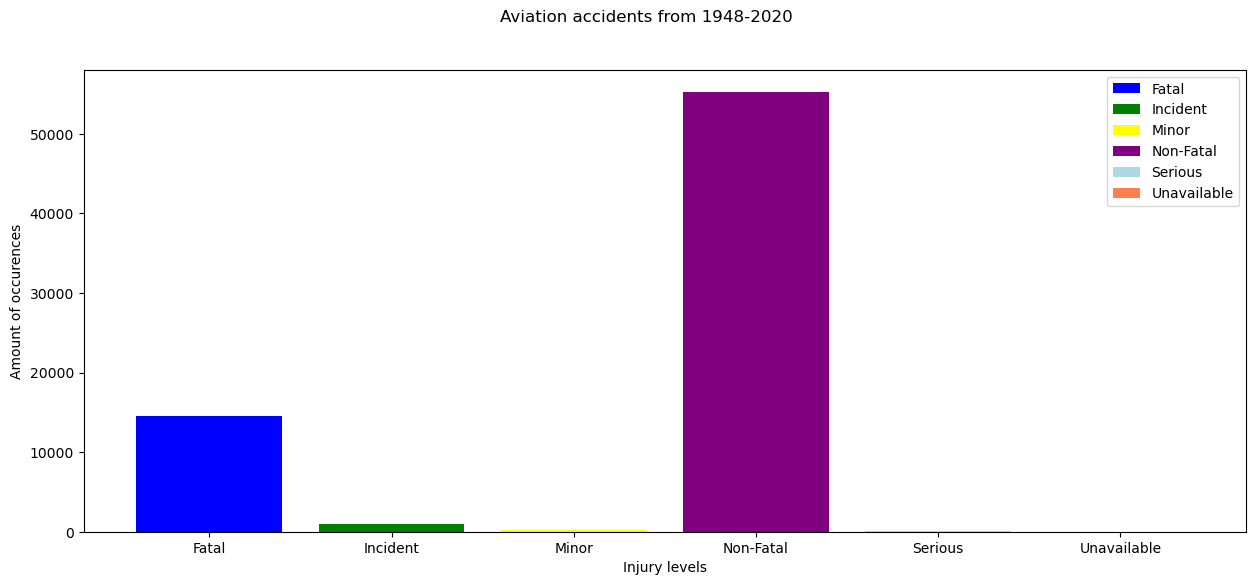

In [104]:
color = ['blue', 'green', 'yellow', 'purple', 'lightblue','coral']
fig, ax = plt.subplots(figsize=(15,6))

ax.bar(injury_type.index, injury_type['Count'], color=color, label=injury_type.index)
# ax.plot(injury_type.index, injury_type[0], marker='o')
ax.set_xlabel('Injury levels')
ax.set_ylabel('Amount of occurences')
# ax.set_title('Aviation accidents from 1948-2020')
fig.suptitle('Aviation accidents from 1948-2020')
ax.legend()
plt.show;



In [105]:
fig.savefig('Aviation_accidents_from_1948_to_2022')

Checking the graph above. 

We can see that a large amount of accidents resulted in Non-Fatal injuries, and significant amount of aircrafts were considered to be 'Fatal'.

## Let's examine which aircrafts had non-fatal accidents

We'll analyze the non-fatal first, and save it to a variable

In [106]:
non_fatal_injuries = data[data['Injury.Severity'] == 'Non-Fatal']
non_fatal_injuries['Injury.Severity'].values

array(['Non-Fatal', 'Non-Fatal', 'Non-Fatal', ..., 'Non-Fatal',
       'Non-Fatal', 'Non-Fatal'], dtype=object)

Next, we will assess aircraft damages obtained by each aircraft. Gathering information from which aircrafts are still usable. We'll start by assessing the aircrafts damage reported on each aircraft within the copy of the non-fatal df

In [107]:
non_fatal_injuries

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,Event_Date
7,20020909X01562,Accident,SEA82DA022,1982-01-01,"PULLMAN, WA",United States,NaN,NaN,NaN,BLACKBURN AG STRIP,...,NaN,0.0,0.0,0.0,2.0,VMC,Takeoff,Probable Cause,01-01-1982,1982-01-01
8,20020909X01561,Accident,NYC82DA015,1982-01-01,"EAST HANOVER, NJ",United States,NaN,NaN,N58,HANOVER,...,NaN,0.0,0.0,0.0,2.0,IMC,Landing,Probable Cause,01-01-1982,1982-01-01
9,20020909X01560,Accident,MIA82DA029,1982-01-01,"JACKSONVILLE, FL",United States,NaN,NaN,JAX,JACKSONVILLE INTL,...,NaN,0.0,0.0,3.0,0.0,IMC,Cruise,Probable Cause,01-01-1982,1982-01-01
10,20020909X01559,Accident,FTW82DA034,1982-01-01,"HOBBS, NM",United States,NaN,NaN,NaN,NaN,...,NaN,0.0,0.0,0.0,1.0,VMC,Approach,Probable Cause,01-01-1982,1982-01-01
11,20020909X01558,Accident,ATL82DKJ10,1982-01-01,"TUSKEGEE, AL",United States,NaN,NaN,NaN,TUSKEGEE,...,NaN,0.0,0.0,0.0,1.0,VMC,Landing,Probable Cause,01-01-1982,1982-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88865,20221212106444,Accident,ERA23LA085,2022-12-12,"Knoxville, TN",United States,355745N,0835218W,DKX,KNOXVILLE DOWNTOWN ISLAND,...,Knoxville Flight Training Academy,0.0,0.0,0.0,1.0,VMC,NaN,NaN,15-12-2022,2022-12-12
88869,20221213106455,Accident,WPR23LA065,2022-12-13,"Lewistown, MT",United States,047257N,0109280W,KLWT,Lewiston Municipal Airport,...,NaN,0.0,0.0,0.0,1.0,NaN,NaN,NaN,14-12-2022,2022-12-13
88873,20221215106463,Accident,ERA23LA090,2022-12-14,"San Juan, PR",United States,182724N,0066554W,SIG,FERNANDO LUIS RIBAS DOMINICCI,...,SKY WEST AVIATION INC TRUSTEE,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022,2022-12-14
88876,20221219106475,Accident,WPR23LA069,2022-12-15,"Wichita, KS",United States,373829N,0972635W,ICT,WICHITA DWIGHT D EISENHOWER NT,...,NaN,0.0,0.0,0.0,1.0,NaN,NaN,NaN,19-12-2022,2022-12-15


In [108]:
non_fatal_injuries.to_csv('./data/non_fatal_injuries.csv', index=False)

There are a number of aircrafts that have damage ranging from Destroyed, Substantial, Minor, and Unknown. Lets focus on gathering information on the aircrafts that have minor damages.

## NTSB and FAA information:

#### Definitions provided:

* **Destroyed** - if all of its primary structure is damaged to the extent that it would be impracticable to return the aircraft to an airworthy condition by repair.
* **Substantial** - damage means damage or failure which adversely affects the structural strength, performance, or flight characteristics of the aircraft, and which would normally require major repair or replacement of the affected component.
* **Minor** - means the aircraft either is in an airworthy condition or is restorable to airworthy condition by minor repairs.

#### Aircraft Damage

Let's explore Aircraft damage and find the percentage for those categories

We will check to see if there are any missing values stil within the column. Even though the missing values were removed earlier. Then check to see the values within the column

In [114]:
non_fatal_injuries['Aircraft.damage'].isna().sum()

0

In [115]:
#check the values within the 'Aircraft.damage column'
non_fatal_injuries['Aircraft.damage']

7        Substantial
8        Substantial
9        Substantial
10       Substantial
11       Substantial
            ...     
88865    Substantial
88869    Substantial
88873    Substantial
88876    Substantial
88886    Substantial
Name: Aircraft.damage, Length: 55287, dtype: object

In [116]:
non_fatal_count = count_categories(non_fatal_injuries, 'Aircraft.damage')
# non_fatal_injuries['Aircraft.damage'].values
non_fatal_count

{'Substantial': 48998, 'Destroyed': 5248, 'Minor': 981, 'Unknown': 60}

In [117]:
def aircraft_damage_percentage(data, damage_type):
    """Finds the percentage for non-fatal aircraft damages"""
    column_length = len(data['Aircraft.damage'])
    total = data['Aircraft.damage'].str.count(damage_type).sum()
    percentage = round(total/column_length * 100, 2)
    return percentage

In [118]:
destroyed_percentage = aircraft_damage_percentage(non_fatal_injuries,'Destroyed')
print(f"Destroyed aircrafts: {destroyed_percentage}%")

Destroyed aircrafts: 9.49%


In [119]:
substantial_percentage = aircraft_damage_percentage(non_fatal_injuries, 'Substantial')
print(f"Substantial aircrafts: {substantial_percentage}%")

Substantial aircrafts: 88.62%


In [120]:
minor_percentage = aircraft_damage_percentage(non_fatal_injuries, 'Minor')
print(f"Minor damaged aircrafts: {minor_percentage}%")

Minor damaged aircrafts: 1.77%


In [121]:
unknown_percentage = aircraft_damage_percentage(non_fatal_injuries, 'Unknown')
print(f"Unknown aircrafts: {unknown_percentage}%")

Unknown aircrafts: 0.11%


### Aricraft Damage visualization

In [122]:
damaged_aircrafts = non_fatal_injuries.groupby('Aircraft.damage').size().reset_index().groupby('Aircraft.damage').max()
type(damaged_aircrafts)
damaged_aircrafts = damaged_aircrafts.rename(columns={0: 'Count'})

In [123]:
damaged_aircrafts

,Count
Aircraft.damage,
Destroyed,5248
Minor,981
Substantial,48998
Unknown,60


In [124]:
damaged_aircrafts.to_csv('./data/damaged_aircrafts.csv', index=False)

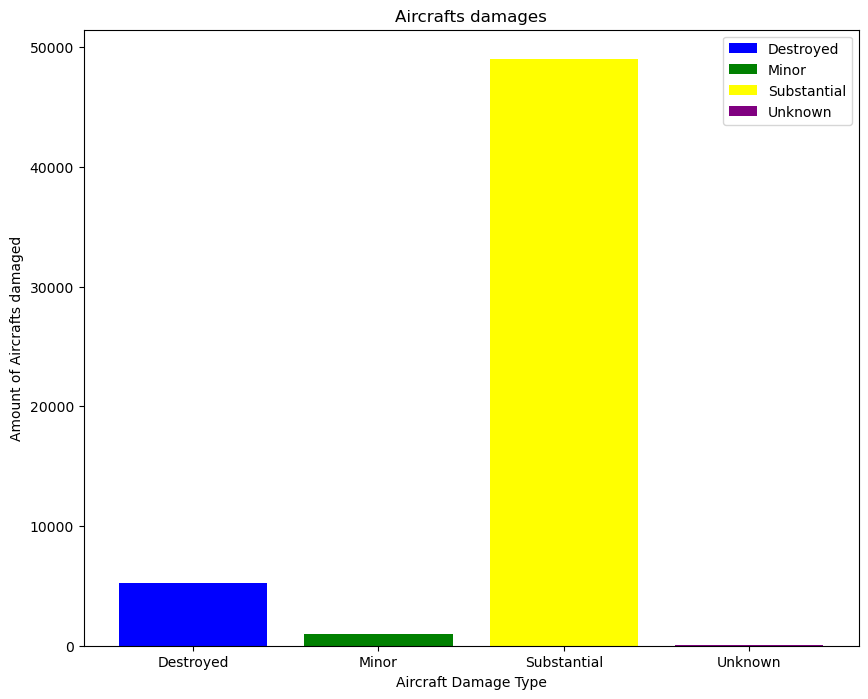

In [125]:
fig, ax = plt.subplots(figsize=(10,8))

ax.bar(damaged_aircrafts.index,damaged_aircrafts['Count'], color=color, label=damaged_aircrafts.index)
ax.set_xlabel("Aircraft Damage Type")
ax.set_ylabel('Amount of Aircrafts damaged')
ax.set_title('Aircrafts damages')
ax.legend()
plt.show()

In [126]:
fig.savefig('Aviation_damage')

As you can see, the amount of aircrafts that have **substantial damage equate to 89.3%** of the amount of planes. While aircrafts considered **destroyed amount to 8.94%**. Aircrafts with **minor damage equate for 1.66%** of the total amount of planes damaged. Let's focus on the aircrafts that have been in non-fatal accidents and are reported with minor damages

## Minor and Fatal accidents 

Using the copy of the data in the non_fatal_injuries df. We'll discover which aircrafts have minor damage

In [127]:
minor_damaged_aircrafts = non_fatal_injuries[non_fatal_injuries['Aircraft.damage'] == 'Minor']

minor_damaged_aircrafts

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,Event_Date
230,20020917X01910,Accident,DCA82AA014,1982-02-03,"PHILADELPHIA, PA",United States,NaN,NaN,PHL,PHILADELPHIA INTL,...,United Airlines Inc.,0.0,1.0,0.0,154.0,IMC,Takeoff,Probable Cause,03-02-1983,1982-02-03
242,20020917X02585,Accident,SEA82DA028A,1982-02-06,"MEDFORD, OR",United States,NaN,NaN,MFR,MEDFORD-JACKSON COUNTY,...,NaN,0.0,0.0,0.0,3.0,VMC,Taxi,Probable Cause,06-02-1983,1982-02-06
244,20020917X02173,Accident,LAX82DA065B,1982-02-06,"SAN JOSE, CA",United States,NaN,NaN,RHV,RIED HILLVIEW,...,NaN,0.0,0.0,0.0,3.0,VMC,Standing,Probable Cause,06-02-1983,1982-02-06
535,20020917X01716,Accident,ATL82DKW06B,1982-03-11,"NASHVILLE, TN",United States,NaN,NaN,BNA,NASHVILLE METRO,...,NaN,0.0,0.0,0.0,2.0,IMC,Taxi,Probable Cause,11-03-1983,1982-03-11
746,20020917X02095,Accident,FTW82DQG17,1982-04-03,"MASTERSON, TX",United States,NaN,NaN,NaN,NaN,...,NaN,0.0,1.0,1.0,0.0,VMC,Cruise,Probable Cause,03-04-1983,1982-04-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88260,20220805105670,Accident,ERA22LA358,2022-07-28,"Dillingham, AK",United States,059241N,1583020W,DLG,Dilingham,...,GRANT AVIATION INC,0.0,0.0,0.0,3.0,VMC,NaN,NaN,18-08-2022,2022-07-28
88445,20220907105882,Accident,GAA22WA271,2022-08-31,"Trangie, OF",American Samoa,315829S,0148012E,NaN,NaN,...,NaN,0.0,0.0,0.0,1.0,NaN,NaN,NaN,05-10-2022,2022-08-31
88605,20221003106034,Incident,DCA23WA002,2022-10-01,"Manila,",Philippines,143553N,0120591E,RPLL,Ninoy Aquino International Air,...,Saudi Airlines,0.0,0.0,0.0,368.0,NaN,NaN,NaN,12-10-2022,2022-10-01
88725,20221027106213,Accident,ERA23LA043,2022-10-27,"Roberta, GA",United States,324249N,0084143W,0GA9,GENTLE LANDINGS AIR PARK,...,NaN,0.0,0.0,0.0,3.0,VMC,NaN,NaN,30-11-2022,2022-10-27


In [128]:
minor_damaged_aircrafts.to_csv('./data/minor_aircraft_damage.csv', index=False)

In [129]:
minor_damaged_aircrafts.shape

(981, 32)

In [130]:
type(minor_damaged_aircrafts)

pandas.core.frame.DataFrame

In [56]:
minor_damaged_aircrafts.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1094 entries, 230 to 88795
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event.Id                1094 non-null   object        
 1   Investigation.Type      1094 non-null   object        
 2   Accident.Number         1094 non-null   object        
 3   Event.Date              1094 non-null   object        
 4   Location                1093 non-null   object        
 5   Country                 1092 non-null   object        
 6   Latitude                549 non-null    object        
 7   Longitude               549 non-null    object        
 8   Airport.Code            673 non-null    object        
 9   Airport.Name            690 non-null    object        
 10  Injury.Severity         1094 non-null   object        
 11  Aircraft.damage         1094 non-null   object        
 12  Aircraft.Category       691 non-null    object    

In [131]:
minor_injury_count = count_categories(minor_damaged_aircrafts, 'Injury.Severity')
minor_injury_count
# minor_damaged_aircrafts['Injury.Severity'].head(50).values

{'Non-Fatal': 981}

The total amount of aircrafts that have minor damage and have had non-fatal occurrences has reduced the copy of the df to **981** rows

In [132]:
minor_damaged_aircrafts['Aircrafts'] = minor_damaged_aircrafts.loc[:, ['Make', 'Injury.Severity', 'Aircraft.damage']].agg(' '.join, axis=1)
minor_damaged_aircrafts

C:\Users\omend\AppData\Local\Temp\ipykernel_28512\1541868804.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  minor_damaged_aircrafts['Aircrafts'] = minor_damaged_aircrafts.loc[:, ['Make', 'Injury.Severity', 'Aircraft.damage']].agg(' '.join, axis=1)


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,Event_Date,Aircrafts
230,20020917X01910,Accident,DCA82AA014,1982-02-03,"PHILADELPHIA, PA",United States,NaN,NaN,PHL,PHILADELPHIA INTL,...,0.0,1.0,0.0,154.0,IMC,Takeoff,Probable Cause,03-02-1983,1982-02-03,Mcdonnell-Douglas Non-Fatal Minor
242,20020917X02585,Accident,SEA82DA028A,1982-02-06,"MEDFORD, OR",United States,NaN,NaN,MFR,MEDFORD-JACKSON COUNTY,...,0.0,0.0,0.0,3.0,VMC,Taxi,Probable Cause,06-02-1983,1982-02-06,Boeing Non-Fatal Minor
244,20020917X02173,Accident,LAX82DA065B,1982-02-06,"SAN JOSE, CA",United States,NaN,NaN,RHV,RIED HILLVIEW,...,0.0,0.0,0.0,3.0,VMC,Standing,Probable Cause,06-02-1983,1982-02-06,Bellanca Non-Fatal Minor
535,20020917X01716,Accident,ATL82DKW06B,1982-03-11,"NASHVILLE, TN",United States,NaN,NaN,BNA,NASHVILLE METRO,...,0.0,0.0,0.0,2.0,IMC,Taxi,Probable Cause,11-03-1983,1982-03-11,Beech Non-Fatal Minor
746,20020917X02095,Accident,FTW82DQG17,1982-04-03,"MASTERSON, TX",United States,NaN,NaN,NaN,NaN,...,0.0,1.0,1.0,0.0,VMC,Cruise,Probable Cause,03-04-1983,1982-04-03,Balloon Works Non-Fatal Minor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88260,20220805105670,Accident,ERA22LA358,2022-07-28,"Dillingham, AK",United States,059241N,1583020W,DLG,Dilingham,...,0.0,0.0,0.0,3.0,VMC,NaN,NaN,18-08-2022,2022-07-28,Cessna Non-Fatal Minor
88445,20220907105882,Accident,GAA22WA271,2022-08-31,"Trangie, OF",American Samoa,315829S,0148012E,NaN,NaN,...,0.0,0.0,0.0,1.0,NaN,NaN,NaN,05-10-2022,2022-08-31,Ayres Non-Fatal Minor
88605,20221003106034,Incident,DCA23WA002,2022-10-01,"Manila,",Philippines,143553N,0120591E,RPLL,Ninoy Aquino International Air,...,0.0,0.0,0.0,368.0,NaN,NaN,NaN,12-10-2022,2022-10-01,Boeing Non-Fatal Minor
88725,20221027106213,Accident,ERA23LA043,2022-10-27,"Roberta, GA",United States,324249N,0084143W,0GA9,GENTLE LANDINGS AIR PARK,...,0.0,0.0,0.0,3.0,VMC,NaN,NaN,30-11-2022,2022-10-27,Cessna Non-Fatal Minor


In [133]:
minor_damaged_aircrafts

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,Event_Date,Aircrafts
230,20020917X01910,Accident,DCA82AA014,1982-02-03,"PHILADELPHIA, PA",United States,NaN,NaN,PHL,PHILADELPHIA INTL,...,0.0,1.0,0.0,154.0,IMC,Takeoff,Probable Cause,03-02-1983,1982-02-03,Mcdonnell-Douglas Non-Fatal Minor
242,20020917X02585,Accident,SEA82DA028A,1982-02-06,"MEDFORD, OR",United States,NaN,NaN,MFR,MEDFORD-JACKSON COUNTY,...,0.0,0.0,0.0,3.0,VMC,Taxi,Probable Cause,06-02-1983,1982-02-06,Boeing Non-Fatal Minor
244,20020917X02173,Accident,LAX82DA065B,1982-02-06,"SAN JOSE, CA",United States,NaN,NaN,RHV,RIED HILLVIEW,...,0.0,0.0,0.0,3.0,VMC,Standing,Probable Cause,06-02-1983,1982-02-06,Bellanca Non-Fatal Minor
535,20020917X01716,Accident,ATL82DKW06B,1982-03-11,"NASHVILLE, TN",United States,NaN,NaN,BNA,NASHVILLE METRO,...,0.0,0.0,0.0,2.0,IMC,Taxi,Probable Cause,11-03-1983,1982-03-11,Beech Non-Fatal Minor
746,20020917X02095,Accident,FTW82DQG17,1982-04-03,"MASTERSON, TX",United States,NaN,NaN,NaN,NaN,...,0.0,1.0,1.0,0.0,VMC,Cruise,Probable Cause,03-04-1983,1982-04-03,Balloon Works Non-Fatal Minor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88260,20220805105670,Accident,ERA22LA358,2022-07-28,"Dillingham, AK",United States,059241N,1583020W,DLG,Dilingham,...,0.0,0.0,0.0,3.0,VMC,NaN,NaN,18-08-2022,2022-07-28,Cessna Non-Fatal Minor
88445,20220907105882,Accident,GAA22WA271,2022-08-31,"Trangie, OF",American Samoa,315829S,0148012E,NaN,NaN,...,0.0,0.0,0.0,1.0,NaN,NaN,NaN,05-10-2022,2022-08-31,Ayres Non-Fatal Minor
88605,20221003106034,Incident,DCA23WA002,2022-10-01,"Manila,",Philippines,143553N,0120591E,RPLL,Ninoy Aquino International Air,...,0.0,0.0,0.0,368.0,NaN,NaN,NaN,12-10-2022,2022-10-01,Boeing Non-Fatal Minor
88725,20221027106213,Accident,ERA23LA043,2022-10-27,"Roberta, GA",United States,324249N,0084143W,0GA9,GENTLE LANDINGS AIR PARK,...,0.0,0.0,0.0,3.0,VMC,NaN,NaN,30-11-2022,2022-10-27,Cessna Non-Fatal Minor


We'll continue by aggregating the amount of aircrafts that have minor and non-fatal incidents

In [135]:
grouped_data = minor_damaged_aircrafts.groupby(['Make', 'Injury.Severity','Aircraft.damage','Aircraft.Category', 'Engine.Type']).agg(Number_of_Aircrafts=('Aircraft.damage', 'size')).reset_index()
grouped_data


,Make,Injury.Severity,Aircraft.damage,Aircraft.Category,Engine.Type,Number_of_Aircrafts
0,2007 Savage Air Llc,Non-Fatal,Minor,Airplane,Turbo Prop,1
1,Aero Vodochody,Non-Fatal,Minor,Airplane,Turbo Fan,1
2,Aerospatiale,Non-Fatal,Minor,Helicopter,Turbo Shaft,1
3,Aerotek Inc,Non-Fatal,Minor,Airplane,Reciprocating,1
4,Agusta,Non-Fatal,Minor,Helicopter,Turbo Shaft,5
...,...,...,...,...,...,...
147,Ttx Air Llc,Non-Fatal,Minor,Airplane,Turbo Prop,1
148,Ultramagic Sa,Non-Fatal,Minor,Airplane,Unknown,1
149,Univar,Non-Fatal,Minor,Airplane,Reciprocating,1
150,Vans Aircraft Inc,Non-Fatal,Minor,Airplane,Reciprocating,1


In [136]:
grouped_data.to_csv('./data/grouped_data_copy.csv', index=False)

Now that we have a copy of the original dataframe. Let's find the aircrafts that are categorized as 'Airplane' to narrow down the analysis for safety features per aircrafts.

In [140]:
airplanes = grouped_data.loc[(grouped_data['Aircraft.Category'] == 'Airplane') & (grouped_data['Number_of_Aircrafts'] >= 5), ['Make','Injury.Severity','Aircraft.Category','Aircraft.damage','Engine.Type','Number_of_Aircrafts']]
airplanes

,Make,Injury.Severity,Aircraft.Category,Aircraft.damage,Engine.Type,Number_of_Aircrafts
8,Airbus,Non-Fatal,Airplane,Minor,Turbo Fan,16
10,Airbus Industrie,Non-Fatal,Airplane,Minor,Turbo Fan,5
16,Beech,Non-Fatal,Airplane,Minor,Reciprocating,8
17,Beech,Non-Fatal,Airplane,Minor,Turbo Prop,9
23,Boeing,Non-Fatal,Airplane,Minor,Turbo Fan,55
30,Bombardier Inc,Non-Fatal,Airplane,Minor,Turbo Fan,10
37,Cessna,Non-Fatal,Airplane,Minor,Reciprocating,42
38,Cessna,Non-Fatal,Airplane,Minor,Turbo Fan,9
45,Cirrus Design Corp,Non-Fatal,Airplane,Minor,Reciprocating,8
63,Embraer,Non-Fatal,Airplane,Minor,Turbo Fan,11


In [141]:
make_with_five_or_more_aircrafts =  grouped_data[(grouped_data['Number_of_Aircrafts'] >= 5) & (grouped_data['Aircraft.Category'] == 'Airplane')]

In [143]:
# make_over_10 = grouped_data[grouped_data['Number_of_Aircrafts'] >= 10]
make_with_five_or_more_aircrafts
make_with_five_or_more_aircrafts.to_csv('./data/nonfatal_minor_damaged_aircrafts_over_five.csv', index=False)

,Make,Injury.Severity,Aircraft.damage,Aircraft.Category,Engine.Type,Number_of_Aircrafts
8,Airbus,Non-Fatal,Minor,Airplane,Turbo Fan,16
10,Airbus Industrie,Non-Fatal,Minor,Airplane,Turbo Fan,5
16,Beech,Non-Fatal,Minor,Airplane,Reciprocating,8
17,Beech,Non-Fatal,Minor,Airplane,Turbo Prop,9
23,Boeing,Non-Fatal,Minor,Airplane,Turbo Fan,55
30,Bombardier Inc,Non-Fatal,Minor,Airplane,Turbo Fan,10
37,Cessna,Non-Fatal,Minor,Airplane,Reciprocating,42
38,Cessna,Non-Fatal,Minor,Airplane,Turbo Fan,9
45,Cirrus Design Corp,Non-Fatal,Minor,Airplane,Reciprocating,8
63,Embraer,Non-Fatal,Minor,Airplane,Turbo Fan,11


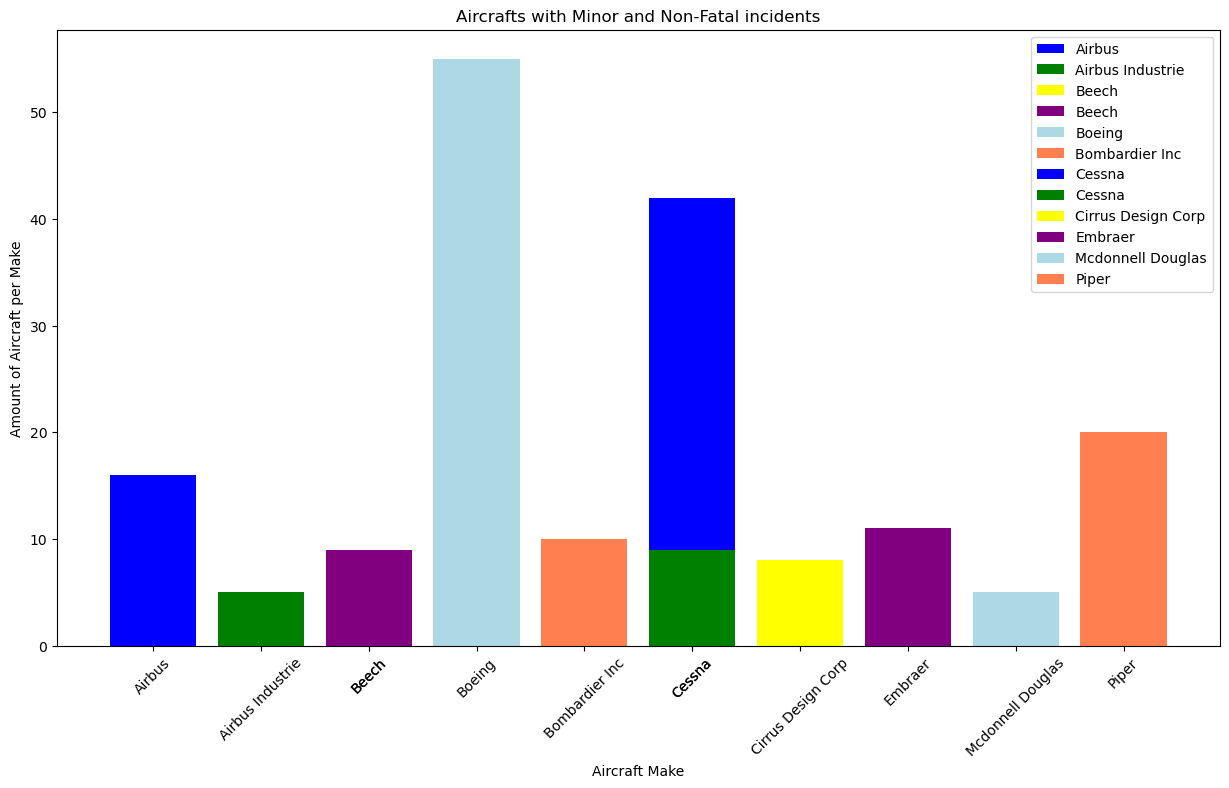

In [145]:
fig, ax = plt.subplots(figsize=(15,8))
# offset = 0.2
# x_positions = np.arange(len(make_with_five_or_more_aircrafts['Make']))

ax.bar(make_with_five_or_more_aircrafts['Make'], make_with_five_or_more_aircrafts['Number_of_Aircrafts'], label=make_with_five_or_more_aircrafts['Make'], color=color)

ax.set_xlabel('Aircraft Make')
ax.set_ylabel('Amount of Aircraft per Make')
ax.set_title('Aircrafts with Minor and Non-Fatal incidents')
ax.set_xticks(make_with_five_or_more_aircrafts['Make'])  # Set the actual values for x-axis ticks
ax.set_xticklabels(make_with_five_or_more_aircrafts['Make'], rotation=45)  # Set the labels for x-axis ticks
ax.legend()

plt.show()

In [146]:
fig.savefig('Aircrafts_with_minor_and_fatal_incidents')

Based on the visualization above, we can see that throughout the dataframe we have a number of aircrafts that fall under the categories of **Non-Fatal** injuries and **Minor** damage. Boeing and Cessna are aircrafts that are considered to fall under these categories.

Next, we'll explore the safety features for each aircrafts to establish which aircrafts are considered safe for the NTSB and FAA

In [68]:
minor_damaged_aircrafts

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,Event_Date,Aircrafts
230,20020917X01910,Accident,DCA82AA014,1982-02-03,"PHILADELPHIA, PA",United States,NaN,NaN,PHL,PHILADELPHIA INTL,...,0.0,1.0,0.0,154.0,IMC,Takeoff,Probable Cause,03-02-1983,1982-02-03,Mcdonnell-Douglas Non-Fatal Minor
242,20020917X02585,Accident,SEA82DA028A,1982-02-06,"MEDFORD, OR",United States,NaN,NaN,MFR,MEDFORD-JACKSON COUNTY,...,0.0,0.0,0.0,3.0,VMC,Taxi,Probable Cause,06-02-1983,1982-02-06,Boeing Non-Fatal Minor
244,20020917X02173,Accident,LAX82DA065B,1982-02-06,"SAN JOSE, CA",United States,NaN,NaN,RHV,RIED HILLVIEW,...,0.0,0.0,0.0,3.0,VMC,Standing,Probable Cause,06-02-1983,1982-02-06,Bellanca Non-Fatal Minor
535,20020917X01716,Accident,ATL82DKW06B,1982-03-11,"NASHVILLE, TN",United States,NaN,NaN,BNA,NASHVILLE METRO,...,0.0,0.0,0.0,2.0,IMC,Taxi,Probable Cause,11-03-1983,1982-03-11,Beech Non-Fatal Minor
746,20020917X02095,Accident,FTW82DQG17,1982-04-03,"MASTERSON, TX",United States,NaN,NaN,NaN,NaN,...,0.0,1.0,1.0,0.0,VMC,Cruise,Probable Cause,03-04-1983,1982-04-03,Balloon Works Non-Fatal Minor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88260,20220805105670,Accident,ERA22LA358,2022-07-28,"Dillingham, AK",United States,059241N,1583020W,DLG,Dilingham,...,0.0,0.0,0.0,3.0,VMC,NaN,NaN,18-08-2022,2022-07-28,Cessna Non-Fatal Minor
88445,20220907105882,Accident,GAA22WA271,2022-08-31,"Trangie, OF",American Samoa,315829S,0148012E,NaN,NaN,...,0.0,0.0,0.0,1.0,NaN,NaN,NaN,05-10-2022,2022-08-31,Ayres Non-Fatal Minor
88605,20221003106034,Incident,DCA23WA002,2022-10-01,"Manila,",Philippines,143553N,0120591E,RPLL,Ninoy Aquino International Air,...,0.0,0.0,0.0,368.0,NaN,NaN,NaN,12-10-2022,2022-10-01,Boeing Non-Fatal Minor
88725,20221027106213,Accident,ERA23LA043,2022-10-27,"Roberta, GA",United States,324249N,0084143W,0GA9,GENTLE LANDINGS AIR PARK,...,0.0,0.0,0.0,3.0,VMC,NaN,NaN,30-11-2022,2022-10-27,Cessna Non-Fatal Minor


In [69]:
minor_damaged_aircrafts.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1094 entries, 230 to 88795
Data columns (total 33 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event.Id                1094 non-null   object        
 1   Investigation.Type      1094 non-null   object        
 2   Accident.Number         1094 non-null   object        
 3   Event.Date              1094 non-null   object        
 4   Location                1093 non-null   object        
 5   Country                 1092 non-null   object        
 6   Latitude                549 non-null    object        
 7   Longitude               549 non-null    object        
 8   Airport.Code            673 non-null    object        
 9   Airport.Name            690 non-null    object        
 10  Injury.Severity         1094 non-null   object        
 11  Aircraft.damage         1094 non-null   object        
 12  Aircraft.Category       691 non-null    object    

Within the dataframe, we can identify safety features by using the **Number of Engines** , **Engine Type**, and **Weather Condition**

Let's start by analyzing the number of engines. We'll see how many missing values there are within the column.

In [70]:
minor_damaged_aircrafts['Number.of.Engines'].head(10)

230     3.0
242     1.0
244     1.0
535     2.0
746     0.0
935     1.0
961     1.0
1031    1.0
1036    1.0
1112    0.0
Name: Number.of.Engines, dtype: float64

In [71]:
minor_damaged_aircrafts['Number.of.Engines'].isna()

230      False
242      False
244      False
535      False
746      False
         ...  
88260    False
88445     True
88605     True
88725    False
88795    False
Name: Number.of.Engines, Length: 1094, dtype: bool

In [72]:
minor_damaged_aircrafts['Number.of.Engines'].isna().sum()

250

We can see that there are a few values missing within the column. We can replace the values with the mean of the total column.

In [73]:
len(minor_damaged_aircrafts['Number.of.Engines'])

1094

In [74]:
engine_number_mean = float(round(minor_damaged_aircrafts['Number.of.Engines'].mean()))
engine_number_mean

2.0

In [75]:
minor_damaged_aircrafts['Number.of.Engines'].fillna(engine_number_mean, inplace=True)

C:\Users\omend\AppData\Local\Temp\ipykernel_26468\2120467351.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  minor_damaged_aircrafts['Number.of.Engines'].fillna(engine_number_mean, inplace=True)


In [76]:
minor_damaged_aircrafts['Number.of.Engines'].isna().sum()

0

In [77]:
minor_damaged_aircrafts['Number.of.Engines'].values

array([3., 1., 1., ..., 2., 1., 1.])

In [78]:
number_of_engines = minor_damaged_aircrafts.groupby(['Make','Aircraft.Category','Number.of.Engines']).agg(Make_count=('Make', 'size')).reset_index()
commercial_aircrafts = number_of_engines[(number_of_engines['Number.of.Engines'] >= 2) & (number_of_engines['Aircraft.Category'] == 'Airplane') & (number_of_engines['Make_count'] >= 5)]
# number_of_engines
commercial_aircrafts
# commercial_aircrafts.to_csv('./data/commercial_aircraft_make_gt.csv', index=False)

,Make,Aircraft.Category,Number.of.Engines,Make_count
16,Airbus,Airplane,2.0,26
20,Airbus Industrie,Airplane,2.0,8
33,Beech,Airplane,2.0,23
41,Boeing,Airplane,2.0,148
43,Boeing,Airplane,4.0,17
45,Bombardier,Airplane,2.0,13
46,Bombardier Inc,Airplane,2.0,14
58,Cessna,Airplane,2.0,44
87,Embraer,Airplane,2.0,22
133,Mcdonnell Douglas,Airplane,2.0,11


In [79]:
minor_damaged_aircrafts['Purpose.of.flight']

230                 Unknown
242      Aerial Application
244                Personal
535                 Unknown
746                Personal
                ...        
88260                   NaN
88445                   NaN
88605                   NaN
88725              Personal
88795         Instructional
Name: Purpose.of.flight, Length: 1094, dtype: object

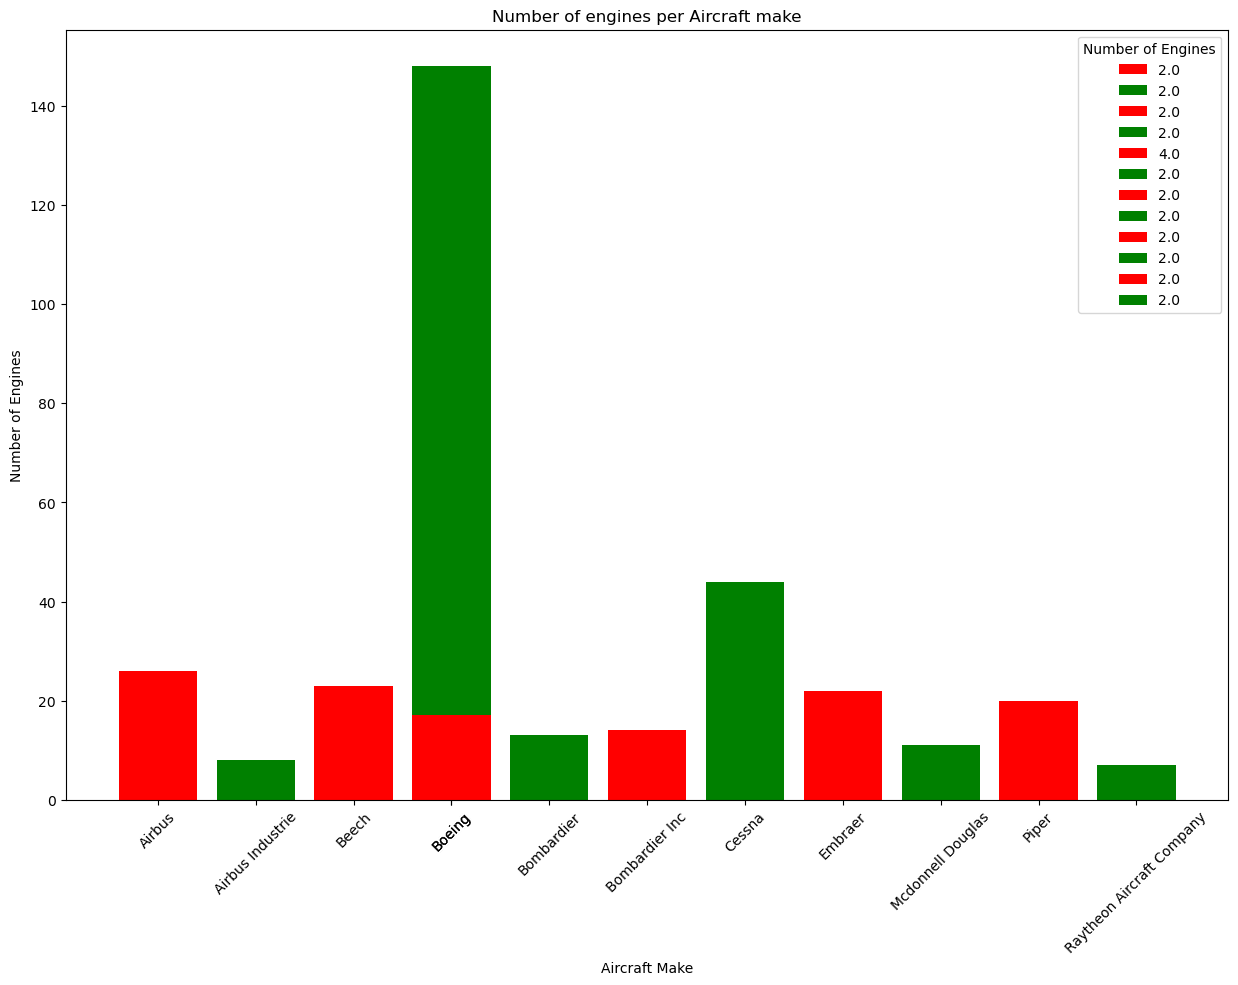

In [80]:
fig, ax = plt.subplots(figsize=(15,10))

# categories = list(make_with_five_or_more_aircraft['Make'])

colors = ['red','green']

ax.bar(commercial_aircrafts['Make'], commercial_aircrafts['Make_count'], label=commercial_aircrafts['Number.of.Engines'],color=colors)
ax.set_xlabel('Aircraft Make')
ax.set_ylabel('Number of Engines')
ax.set_title('Number of engines per Aircraft make')
ax.set_xticks(commercial_aircrafts['Make'])
ax.set_xticklabels(commercial_aircrafts['Make'], rotation=45)
ax.set_label('Label via method')
ax.legend(title='Number of Engines')
plt.show();


In [81]:
fig.savefig('Number_of_engines_per_aircraft')

Commercial aircrafts are required to have 4 engines, fora number of safety reasons. Transporting large number of passengers, and cargo/luggage. In the event of engine failure, the other engines can provide additional support to keep the plane stable. Based on these findings, aircrafts that provide the best possbility are boeing aircrafts.

For private use, which require aircrafts to have 2+ engines. Based off of the findings, we can see that Airbus, Beech, Boeing, Bomabardier, Cessna, Embraer, Mcdonnell Douglas, and Piper have the most available aircrafts and have minor, non-fatal incidents. 

In [82]:
minor_damaged_aircrafts.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1094 entries, 230 to 88795
Data columns (total 33 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event.Id                1094 non-null   object        
 1   Investigation.Type      1094 non-null   object        
 2   Accident.Number         1094 non-null   object        
 3   Event.Date              1094 non-null   object        
 4   Location                1093 non-null   object        
 5   Country                 1092 non-null   object        
 6   Latitude                549 non-null    object        
 7   Longitude               549 non-null    object        
 8   Airport.Code            673 non-null    object        
 9   Airport.Name            690 non-null    object        
 10  Injury.Severity         1094 non-null   object        
 11  Aircraft.damage         1094 non-null   object        
 12  Aircraft.Category       691 non-null    object    

Next we'll explore the Engine Type for each aircraft

In [83]:
minor_damaged_aircrafts['Engine.Type'].head(50)

230         Turbo Fan
242     Reciprocating
244     Reciprocating
535     Reciprocating
746           Unknown
935       Turbo Shaft
961       Turbo Shaft
1031    Reciprocating
1036    Reciprocating
1112          Unknown
1360       Turbo Prop
1633          Unknown
1634          Unknown
1731    Reciprocating
1969        Turbo Fan
2264    Reciprocating
2315    Reciprocating
2460    Reciprocating
2478          Unknown
2526    Reciprocating
2597    Reciprocating
2656    Reciprocating
3202        Turbo Jet
3560    Reciprocating
3969       Turbo Prop
4040          Unknown
4140    Reciprocating
4189        Turbo Jet
4673    Reciprocating
4705    Reciprocating
5041    Reciprocating
5129        Turbo Jet
5397    Reciprocating
5646    Reciprocating
5824    Reciprocating
6059    Reciprocating
6063    Reciprocating
6384    Reciprocating
6739       Turbo Prop
6781    Reciprocating
6886        Turbo Fan
6949    Reciprocating
7125      Turbo Shaft
7593    Reciprocating
7612        Turbo Jet
7711    Re

There are 5 types of Engines: 

* **Reciprocating Engine** - Also known as a piston engine or internal combustion engine, it is a heat engine using fuel ignition created inside a single or multiple reciprocating pistons to produce high temperatures and high pressure, which generates rotating motion.

* **Turbodrop Engine** - A turboprop engine is a type of aircraft engine offering the low maintenance and high speeds of a gas turbine engine with the reliability of a propeller drive system.

* **Turboshaft Engine** - Turboshaft engines are lightweight and powerful aircraft engines commonly used in real-world applications requiring fuel-efficient, robust, and compact powerplants like tanks, helicopters, hovercrafts, and auxiliary power units.

* **Turbojet Engine** - A turbojet engine is a type of aircraft engine whose primary means of propulsion is the rearward discharge of hot exhaust gas. It is an airbreathing jet engine that works by sucking atmospheric air into a compressor. 

* **TurboFan Engine** - Another air-breathing engine, the turbofan engine, is a type of aircraft engine commonly found on large commercial airliners.

Next, we'll identify the amount of missing values within the Engine Type column, and decide what would be best method to handle the missing the missing values.

In [84]:
# data['Engine.Type'].isna().sum()
minor_damaged_aircrafts['Engine.Type']

230          Turbo Fan
242      Reciprocating
244      Reciprocating
535      Reciprocating
746            Unknown
             ...      
88260              NaN
88445              NaN
88605              NaN
88725              NaN
88795              NaN
Name: Engine.Type, Length: 1094, dtype: object

Now that we have removed the missing values from the engine type within a copy. Let's add it to the make_over_ten_aircrafts dataframe 

In [85]:
minor_damaged_aircrafts['Engine.Type'].isna().sum()

309

In [86]:
# minor_damaged_aircrafts[(minor_damaged_aircrafts['Make'] == 'Airbus') & (minor_damaged_aircrafts['Engine.Type'] == 'Reciprocating')]
minor_damaged_aircrafts.loc[(minor_damaged_aircrafts['Make'] == 'Airbus') & (minor_damaged_aircrafts['Engine.Type'] == 'Turbo Fan')]

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,Event_Date,Aircrafts
61671,20070426X00458,Accident,CHI07FA020A,2006-11-07,"Chicago, IL",United States,41.978611,-87.904722,ORD,O'Hare International,...,NaN,NaN,NaN,216.0,IMC,Taxi,Probable Cause,15-02-2018,2006-11-07,Airbus Non-Fatal Minor
67466,20091117X55556,Incident,CEN10IA053,2009-11-15,"Kansas City, MO",United States,391752N,0944250W,MCI,Kansas City International,...,0.0,0.0,0.0,130.0,VMC,NaN,The in-flight engine ingestion of one or more ...,25-09-2020,2009-11-15,Airbus Non-Fatal Minor
67710,20100310X91532,Incident,ENG10WA019,2010-02-09,"Cologne-Bonn Airport, Germany",Germany,NaN,NaN,MNB,Cologne-Bonn Airport,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,03-11-2020,2010-02-09,Airbus Non-Fatal Minor
67954,20100503X82523,Incident,ENG10IA026,2010-04-05,"Newark, NJ",United States,404422N,0074109W,EWR,Newark International Airport,...,0.0,0.0,0.0,140.0,NaN,NaN,The separation of both halves of the left engi...,25-09-2020,2010-04-05,Airbus Non-Fatal Minor
68805,20100827X20401,Incident,WPR10IA430,2010-08-26,"Sacramento, CA",United States,384144N,1213527W,SMF,Sacramento International,...,0.0,7.0,0.0,84.0,VMC,NaN,The first officers inadvertent activation of ...,25-09-2020,2010-08-26,Airbus Non-Fatal Minor
69767,20110404X21934,Incident,DCA11IA040,2011-04-04,"New Orleans, LA",United States,295923N,0901458W,MSY,Louis Armstrong New Orleans,...,0.0,0.0,0.0,109.0,IMC,NaN,the captain's failure to properly recognize an...,25-09-2020,2011-04-04,Airbus Non-Fatal Minor
71864,20130604X82231,Incident,ENG12WA038,2012-05-27,"CAM RANH, Vietnam, Vietnam",Vietnam,NaN,NaN,CXR,CAM RANH Airport Vietnam,...,0.0,0.0,0.0,91.0,NaN,NaN,NaN,03-11-2020,2012-05-27,Airbus Non-Fatal Minor
72334,20121101X94754,Incident,ENG12WA036,2012-08-03,"Rome, Italy",Italy,NaN,NaN,LIRF,"Rome, Italy",...,0.0,0.0,0.0,100.0,NaN,NaN,NaN,25-09-2020,2012-08-03,Airbus Non-Fatal Minor
72366,20120811X13221,Accident,DCA12CA122,2012-08-10,"Dulles, VA",United States,385651N,0077270W,IAD,Washington Dulles Internationa,...,0.0,0.0,0.0,270.0,VMC,NaN,the A330 flight crew's failure to maintain a s...,13-09-2021,2012-08-10,Airbus Non-Fatal Minor
73107,20130118X53100,Accident,DCA13LA039,2013-01-17,"Miami, FL",United States,254725N,0801630W,MIA,Miami Intl,...,0.0,0.0,0.0,397.0,VMC,NaN,LV-BMT flight crew's incorrect evaluation of t...,25-09-2020,2013-01-17,Airbus Non-Fatal Minor


In [87]:
engine_types = minor_damaged_aircrafts.groupby(['Make','Engine.Type','Number.of.Engines']).agg(Total_aircrafts=('Make', 'size')).reset_index()
engines_amount_df = engine_types[engine_types['Total_aircrafts'] >= 10]
engines_amount_df
# engines_amount_df.to_csv('./data/engine_total.csv', index=False)

,Make,Engine.Type,Number.of.Engines,Total_aircrafts
14,Airbus,Turbo Fan,2.0,17
17,Airbus Industrie,Turbo Fan,2.0,12
30,Balloon Works,Unknown,2.0,10
34,Beech,Reciprocating,2.0,12
35,Beech,Turbo Prop,2.0,12
36,Bell,Turbo Shaft,1.0,13
43,Boeing,Turbo Fan,2.0,66
44,Boeing,Turbo Fan,3.0,10
45,Boeing,Turbo Fan,4.0,13
59,Bombardier Inc,Turbo Fan,2.0,10


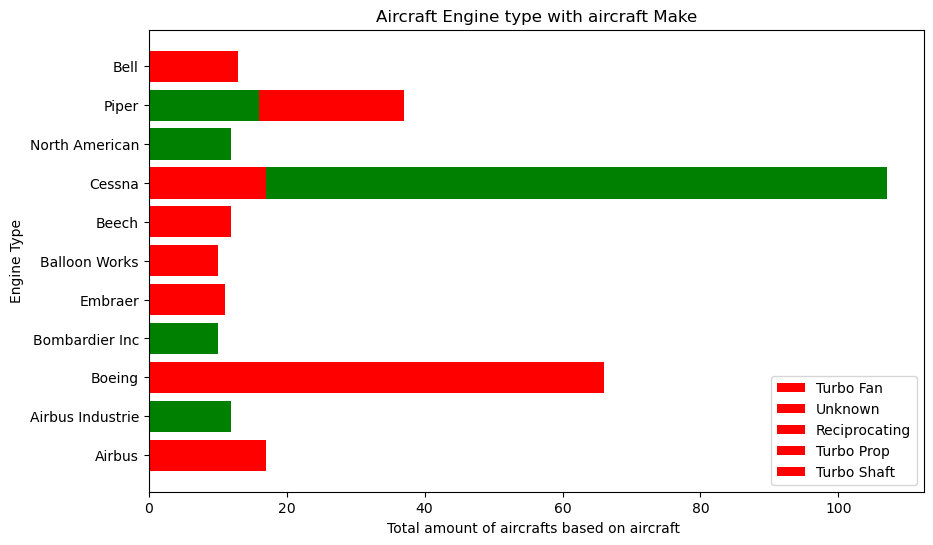

In [88]:
# make_over_ten_aircrafts = pd.merge(make_over_ten_aircrafts,dropped_engine_types_df, left_on='Make', right_index=True, how='left')
# make_over_ten_aircrafts
# Plot horizontal bars for each engine type

fig, ax = plt.subplots(figsize=(10,6))


for i, engine_type in enumerate(engines_amount_df['Engine.Type'].unique()):
    subset_df = engines_amount_df[engines_amount_df['Engine.Type'] == engine_type]
    ax.barh(subset_df['Make'], subset_df['Total_aircrafts'], label=engine_type, color=colors)
ax.set_title('Aircraft Engine type with aircraft Make')
ax.set_xlabel('Total amount of aircrafts based on aircraft ')
ax.set_ylabel('Engine Type')
ax.legend(loc='lower right')
plt.show();

In [89]:
fig.savefig('Aircraft_Engines_with_aircraft_make')

As we can see aircrafts that provide the most available engine types are boeing, and cessna. Having **Turbo Prop** and **Turbo Fan** engines.

The final assessment will be the weather conditions for each aircraft

In [90]:
minor_damaged_aircrafts['Weather.Condition']

230      IMC
242      VMC
244      VMC
535      IMC
746      VMC
        ... 
88260    VMC
88445    NaN
88605    NaN
88725    VMC
88795    VMC
Name: Weather.Condition, Length: 1094, dtype: object

**VMC** conditions describe the weather conditions and situations in which a pilot can sufficiently and safely maintain visuals of all other aircraft and the terrain around them. The factors that affect VMC include visibility, cloud ceilings, and cloud clearances. During VMC, VFR flight is permitted.

**IMC** conditions describe a situation in which visibility and the weather require the pilot to rely on their instruments, and thus conduct an IFR flight. This is typically done when flying through clouds, as well as general bad weather. Pilots are sometimes trained to fly in such conditions to teach them to rely on instrument indications.

In [91]:
minor_damaged_aircrafts['Weather.Condition'].isna().sum()

269

In [92]:
minor_damaged_aircrafts.dropna(subset=['Weather.Condition'], inplace=True)

C:\Users\omend\AppData\Local\Temp\ipykernel_26468\2063450494.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  minor_damaged_aircrafts.dropna(subset=['Weather.Condition'], inplace=True)


In [93]:
minor_damaged_aircrafts['Weather.Condition'].isna().sum()

0

In [94]:
weather_df = minor_damaged_aircrafts.groupby(['Make','Weather.Condition']).agg(Total_weather_condition=('Make', 'size')).reset_index()
total_weather_aircrafts = weather_df[(weather_df['Total_weather_condition'] > 10)]
total_weather_aircrafts
# total_weather_aircrafts.to_csv('./data/total_weather_conditions_per_aircraft.csv', index=False)

,Make,Weather.Condition,Total_weather_condition
17,Airbus,VMC,11
20,Airbus Industrie,VMC,13
30,Balloon Works,VMC,15
35,Beech,VMC,30
37,Bell,VMC,13
43,Boeing,IMC,14
46,Boeing,VMC,73
71,Cessna,VMC,138
106,Embraer,VMC,13
165,Mcdonnell Douglas,VMC,15


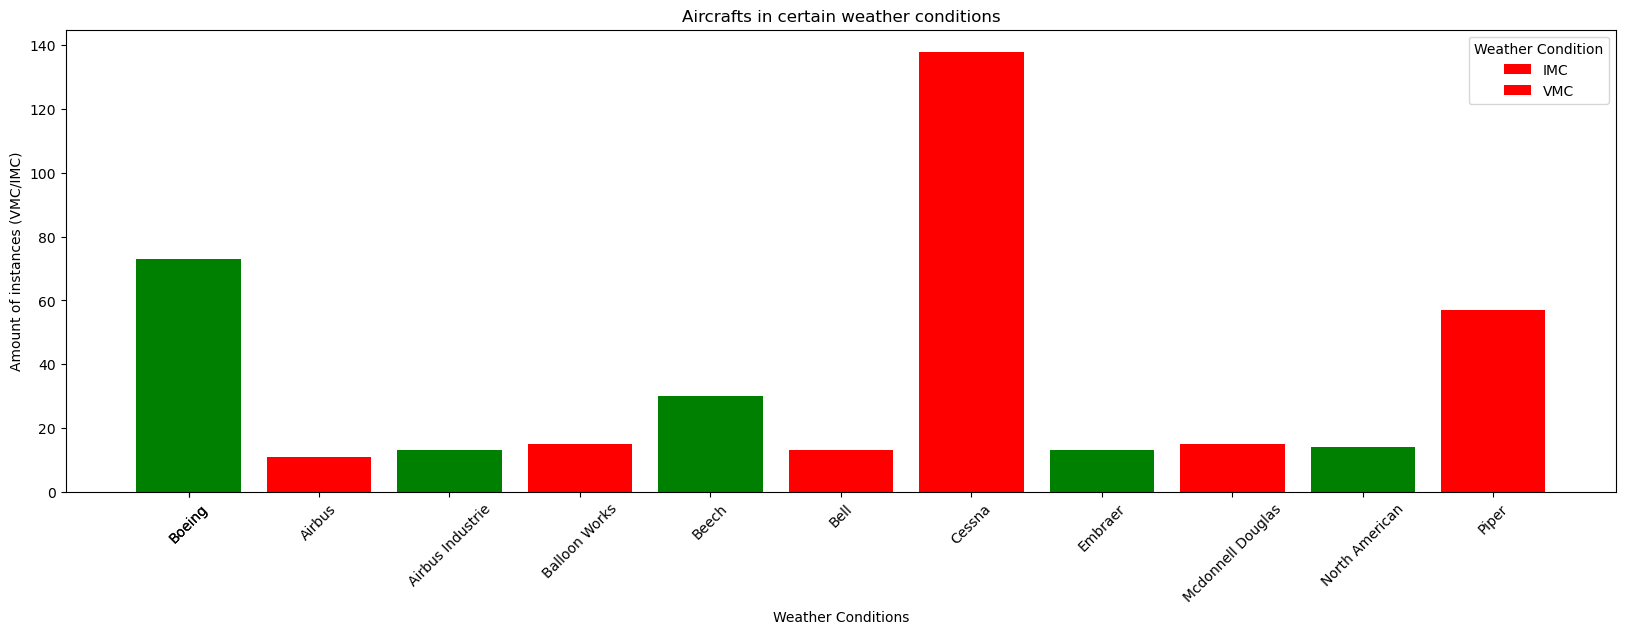

In [95]:
fig, ax = plt.subplots(figsize=(20,6))

# colors = ['red','green']
weather_conditions = sorted(total_weather_aircrafts['Weather.Condition'].unique())

for i, condition in enumerate(weather_conditions):
    subset_df = total_weather_aircrafts[total_weather_aircrafts['Weather.Condition'] == condition]
    ax.bar(subset_df['Make'], subset_df['Total_weather_condition'], label=condition, color=colors)
    
# ax.bar(total_weather_aircrafts['Make'], total_weather_aircrafts['Total_weather_make'], label=sorted(total_weather_aircrafts['Weather.Condition']), color=colors)
ax.set_xlabel('Weather Conditions')
ax.set_ylabel('Amount of instances (VMC/IMC)')
ax.set_title('Aircrafts in certain weather conditions')
ax.set_xticks(total_weather_aircrafts['Make'])
ax.set_xticklabels(total_weather_aircrafts['Make'], rotation=45)
ax.legend(title='Weather Condition')
plt.show();

Based off the visualization and data provided above, aircrafts that encountered weather conditions **VMC**:

* Beech
* Bell
* Boeing
* Cessna
* Cirrus Design Corp

All other aircrafts that fall under the scope of **IMC** does not neccessarily eliminate the aircraft but I decided to focus on aircrafts that have more than one instance experiencing weather conditions.

## Aircraft Damage by Number of Engines

In [147]:
data['Number.of.Engines'].fillna(float(round(data['Number.of.Engines'].mean())), inplace=True)
data['Number.of.Engines'].isna().sum()

0

In [148]:
engine_count = count_categories(data,'Number.of.Engines')
engine_count
#data['Number.of.Engines'].value_counts()

{1.0: 61692, 2.0: 8100, 0.0: 841, 3.0: 276, 4.0: 259, 8.0: 2, 6.0: 1}

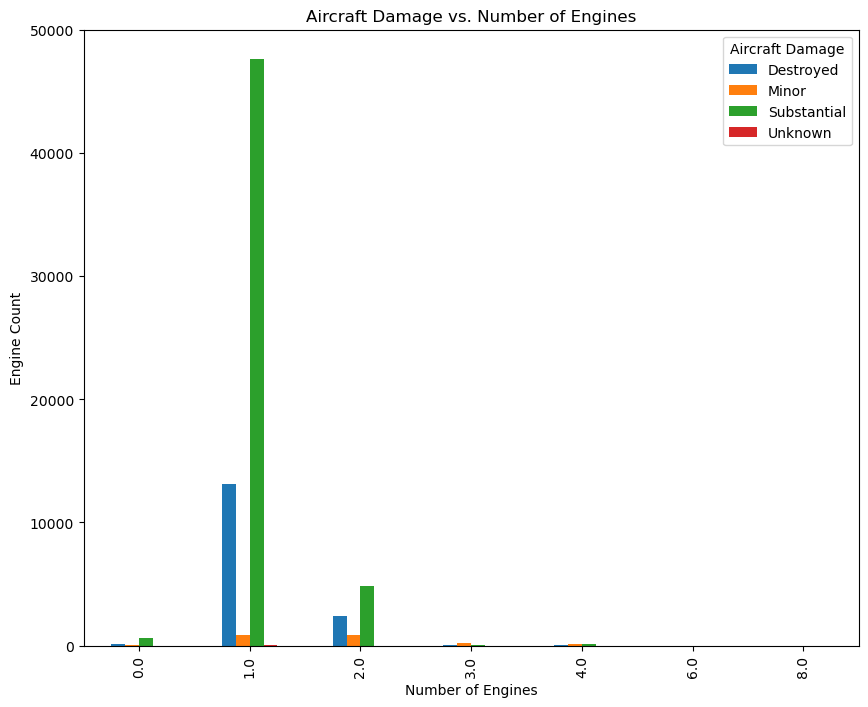

In [149]:
fig, ax = plt.subplots(figsize=(10,8))

# Group the data by 'Number.of.Engines' and 'Aircraft.damage', and count occurrences
grouped_df = data.groupby(['Number.of.Engines', 'Aircraft.damage']).size().unstack()

# Plot the grouped bar chart
# grouped_data.T.plot(kind='line', ax=ax, marker='o')
grouped_df.plot(kind='bar', ax=ax)

# Set labels and title
ax.set_xlabel('Number of Engines')
ax.set_ylabel('Engine Count')
ax.set_title('Aircraft Damage vs. Number of Engines')

# Add legend
ax.legend(title='Aircraft Damage')


plt.show();

In [150]:
grouped_df

Aircraft.damage,Destroyed,Minor,Substantial,Unknown
Number.of.Engines,,,,
0.0,148.0,46.0,645.0,2.0
1.0,13091.0,883.0,47635.0,83.0
2.0,2398.0,875.0,4820.0,7.0
3.0,18.0,175.0,83.0,NaN
4.0,51.0,113.0,95.0,NaN
6.0,NaN,NaN,1.0,NaN
8.0,NaN,NaN,2.0,NaN


In [103]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 85164 entries, 0 to 88886
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event.Id                85164 non-null  object        
 1   Investigation.Type      85164 non-null  object        
 2   Accident.Number         85164 non-null  object        
 3   Event.Date              85164 non-null  object        
 4   Location                85119 non-null  object        
 5   Country                 84954 non-null  object        
 6   Latitude                33278 non-null  object        
 7   Longitude               33268 non-null  object        
 8   Airport.Code            48910 non-null  object        
 9   Airport.Name            51441 non-null  object        
 10  Injury.Severity         85164 non-null  object        
 11  Aircraft.damage         85164 non-null  object        
 12  Aircraft.Category       30361 non-null  object     

In [157]:
purpose_of_flight_count = count_categories(data, 'Purpose.of.flight')
purpose_of_flight_count
# data['Purpose.of.flight'].value_counts()

{'Personal': 41109,
 'Instructional': 8714,
 'Unknown': 5590,
 'Aerial Application': 4103,
 'Business': 3456,
 'Positioning': 1204,
 'Other Work Use': 935,
 'Ferry': 724,
 'Aerial Observation': 659,
 'Public Aircraft': 523,
 'Executive/corporate': 447,
 'Flight Test': 250,
 'Skydiving': 109,
 'External Load': 98,
 'Air Race show': 90,
 'Public Aircraft - Federal': 78,
 'Banner Tow': 76,
 'Public Aircraft - Local': 61,
 'Public Aircraft - State': 47,
 'Glider Tow': 43,
 'Firefighting': 31,
 'Air Drop': 7,
 'ASHO': 6,
 'PUBS': 4,
 'PUBL': 1}

In [195]:
# Group by 'Purpose.of.flight' and count occurrences
grouped_counts = data.groupby('Purpose.of.flight').agg({
    'Total.Fatal.Injuries': 'sum',
    'Total.Serious.Injuries': 'sum',
    'Total.Minor.Injuries': 'sum',
    'Total.Uninjured': 'sum'
}).reset_index()

grouped_counts

,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
0,ASHO,14.0,1.0,0.0,1.0
1,Aerial Application,448.0,541.0,665.0,2576.0
2,Aerial Observation,331.0,278.0,252.0,690.0
3,Air Drop,7.0,3.0,2.0,8.0
4,Air Race show,39.0,16.0,14.0,53.0
5,Banner Tow,15.0,26.0,5.0,40.0
6,Business,1977.0,735.0,927.0,4701.0
7,Executive/corporate,355.0,115.0,148.0,1127.0
8,External Load,31.0,23.0,27.0,52.0
9,Ferry,191.0,99.0,195.0,559.0


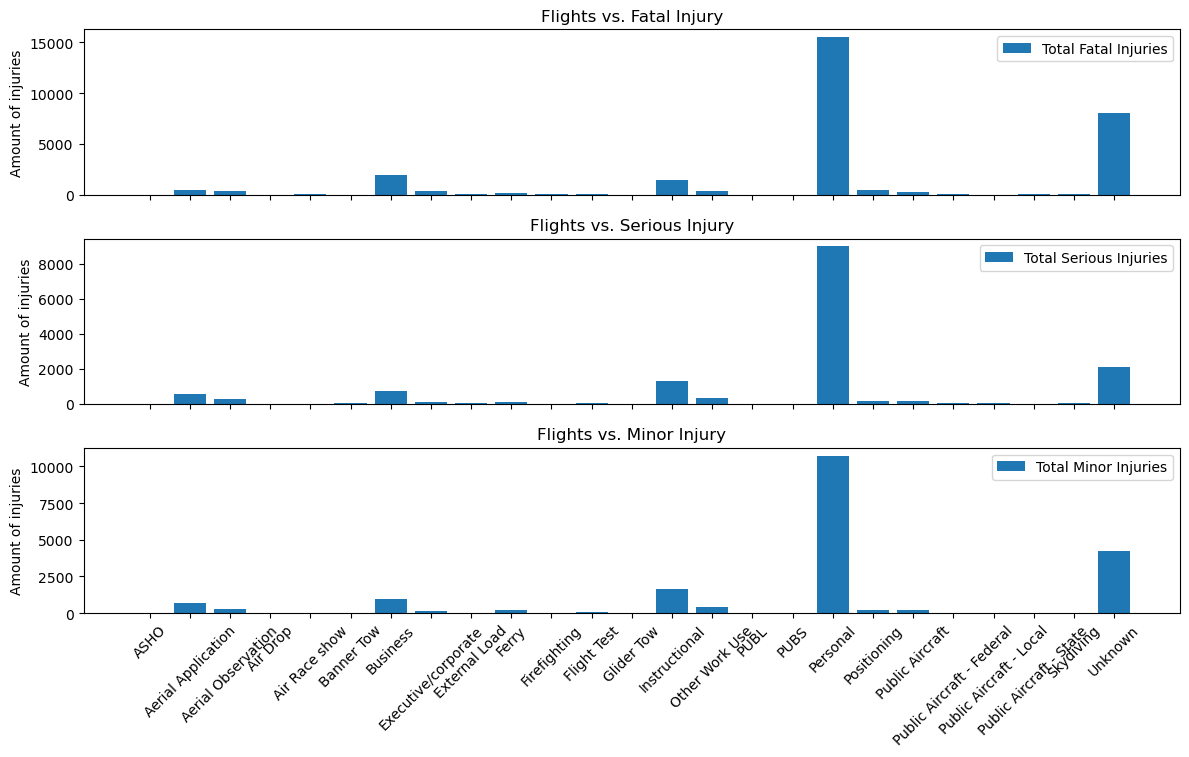

In [197]:

# Create subplots with 3 axes
fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, ncols=1, figsize=(12, 8), sharex='col')

# Plot Total Fatal Injuries
ax0.bar(grouped_counts['Purpose.of.flight'], grouped_counts['Total.Fatal.Injuries'], label='Total Fatal Injuries')
ax0.set_ylabel('Amount of injuries')
ax0.set_title('Flights vs. Fatal Injury')
ax0.legend()

# Plot Total Serious Injuries
ax1.bar(grouped_counts['Purpose.of.flight'], grouped_counts['Total.Serious.Injuries'], label='Total Serious Injuries')
ax1.set_ylabel('Amount of injuries')
ax1.set_title('Flights vs. Serious Injury')
ax1.legend()

# Plot Total Minor Injuries
ax2.bar(grouped_counts['Purpose.of.flight'], grouped_counts['Total.Minor.Injuries'], label='Total Minor Injuries')
ax2.set_ylabel('Amount of injuries')
ax2.set_title('Flights vs. Minor Injury')
ax2.legend()

# Set custom x-axis ticks and labels
custom_ticks = range(len(grouped_counts['Purpose.of.flight']))
plt.xticks(custom_ticks, grouped_counts['Purpose.of.flight'], rotation=45)

# Adjust layout to accommodate suptitle
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Show the plots
plt.show()

In [198]:
data['Schedule'].value_counts()

Schedule
UNK     3999
NSCH    3386
SCHD    1717
Name: count, dtype: int64

In [199]:
data['Engine.Type'].value_counts()

Engine.Type
Reciprocating      58409
Turbo Shaft         2830
Turbo Prop          2471
Unknown             1646
Turbo Fan           1173
Turbo Jet            421
Electric               8
NONE                   2
Hybrid Rocket          1
Geared Turbofan        1
LR                     1
UNK                    1
Name: count, dtype: int64

In [200]:
data['Injury.Severity'].value_counts()

Injury.Severity
Non-Fatal      55287
Fatal          14502
Incident        1018
Minor            204
Serious          151
Unavailable        9
Name: count, dtype: int64

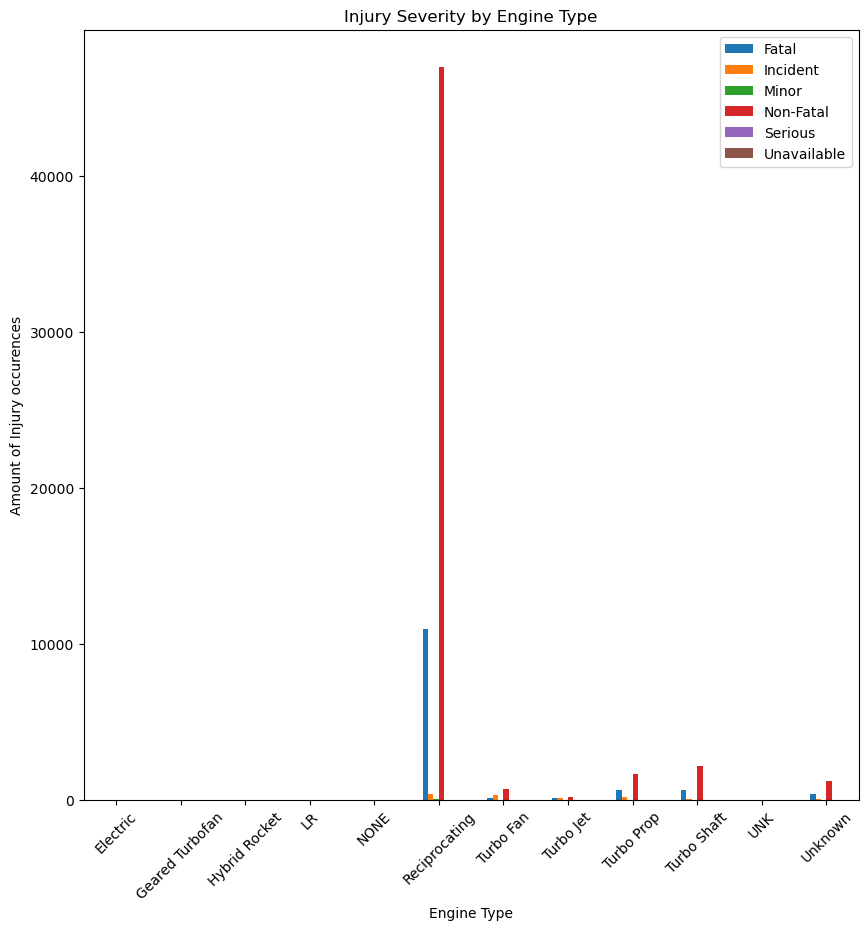

In [214]:
fig,ax = plt.subplots(figsize=(10,10))

grouped_columns = data.groupby(['Engine.Type','Injury.Severity']).size().unstack().reset_index()

# Plot each column as a bar
grouped_columns.set_index('Engine.Type').plot.bar(rot=45, ax=ax)

# Set labels and title
ax.set_xlabel('Engine Type')
ax.set_ylabel('Amount of Injury occurences')
ax.set_title('Injury Severity by Engine Type')
ax.set_xticks(range(len(grouped_columns['Engine.Type'])))
ax.set_xticklabels(grouped_columns['Engine.Type'], rotation=45)

# Add legend
ax.legend()

plt.show()

# Conclusion

Based off of the ananlysis of this dataset. Assessing certain aspects of wach aircrafts ranging from Injury-Severity to the Weather Condition. After creating a copy of the original dataframe to ensure that we have aircrafts that fall under **Minor** and **Non-Fatal** categories.

We are able to conclude that the best aircrafts availble for commercial and private use would be as follows:
* 1. Boeing
* 2. Cessna
* 3. Airbus/Piper
